In [3]:
import librosa
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
filepath = "audios/ayat1.mp3"

In [36]:
# from pydub import AudioSegment

# # files               
# dst = "test3.wav"

# # convert wav to mp3                                                            
# audSeg = AudioSegment.from_mp3("test3.mp3")
# audSeg.export(dst, format="wav")

In [23]:
def data_sample(path):
    return librosa.load(path)


def dis_waveshow(data, sample_rate, alpha=1):
    librosa.display.waveshow(data, sr=sample_rate, alpha=alpha)

    
def dis_spectogram(data, sample_rate):
    plt.close()
    plt.figure(figsize=(14, 5))
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.show()
    
    
def dis_chroma(data, sample_rate, title="Chromagram"):
    chroma=librosa.feature.chroma_stft(y=data, sr=sample_rate)
    fig, ax = plt.subplots(1,figsize = (10, 5))
    img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
    fig.colorbar(img, ax=ax)
    ax.set(title=title)
    

def dis_cqt(data, sample_rate, title=''):
    chroma_stft = librosa.feature.chroma_stft(y=data, sr=sample_rate)
    chroma_cq = librosa.feature.chroma_cqt(y=data, sr=sample_rate)
    fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True,figsize = (10, 9))
    librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0])
    ax[0].set(title= title+' chroma_stft')
    ax[0].label_outer()
    img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[1])
    ax[1].set(title=title+' chroma_cqt')
    fig.colorbar(img, ax=ax)

In [5]:
data1, sample_rate1 = data_sample('audios/1/ayat11.mp3')
data2, sample_rate2 = data_sample('audios/1/ayat12.mp3')
data3, sample_rate3 = data_sample('audios/1/ayat13.mp3')

# Wave Show

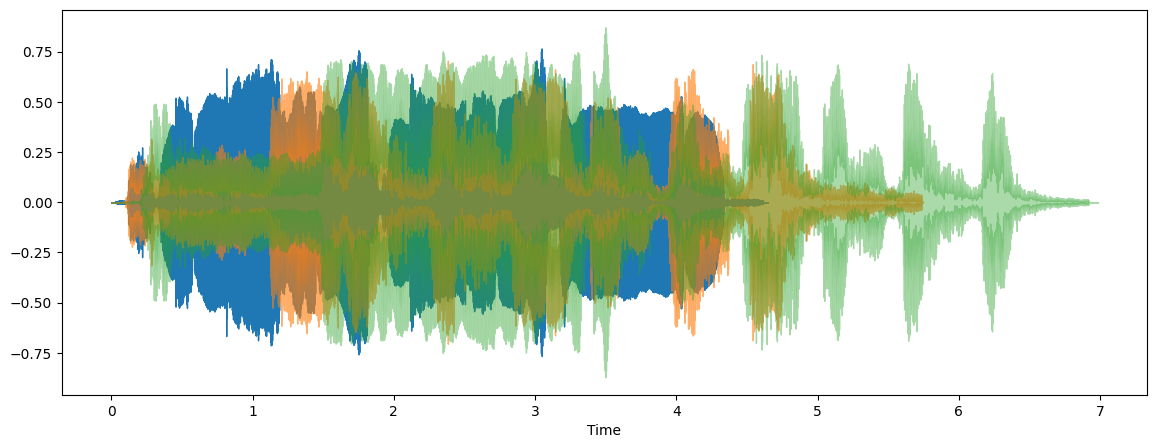

In [13]:
plt.figure(figsize=(14, 5))
dis_waveshow(data1, sample_rate1)
dis_waveshow(data2, sample_rate2, alpha=0.6)
dis_waveshow(data3, sample_rate3, alpha=0.4)
plt.show()

# Spectrogram
### A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio signals.

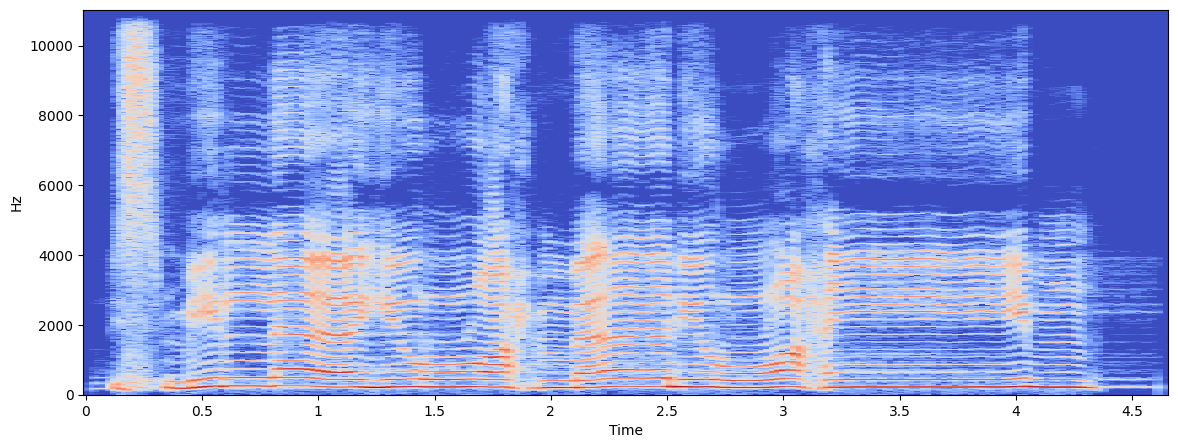

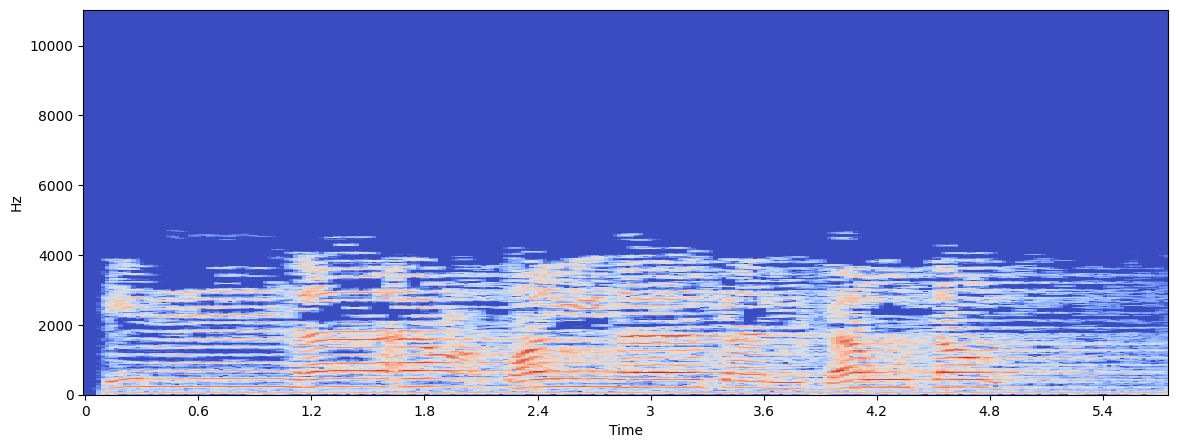

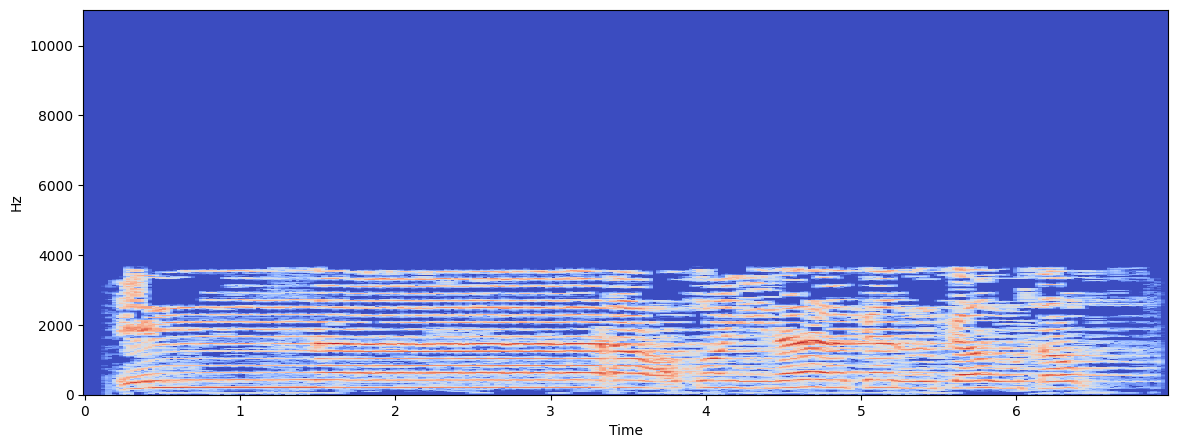

In [14]:
#display Spectrogram
dis_spectogram(data1, sample_rate1)
dis_spectogram(data2, sample_rate2)
dis_spectogram(data3, sample_rate3)

# Zero Crossing Rate
### is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back. This feature has been used heavily in both speech recognition and music information retrieval. It usually has higher values for highly percussive sounds like those in metal and rock.

### we'll print spectrum for 100 array columns only

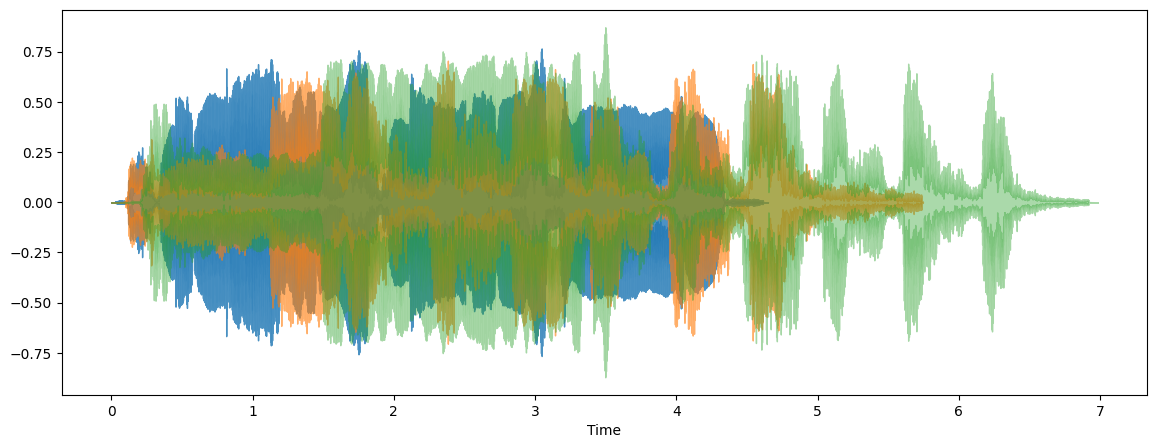

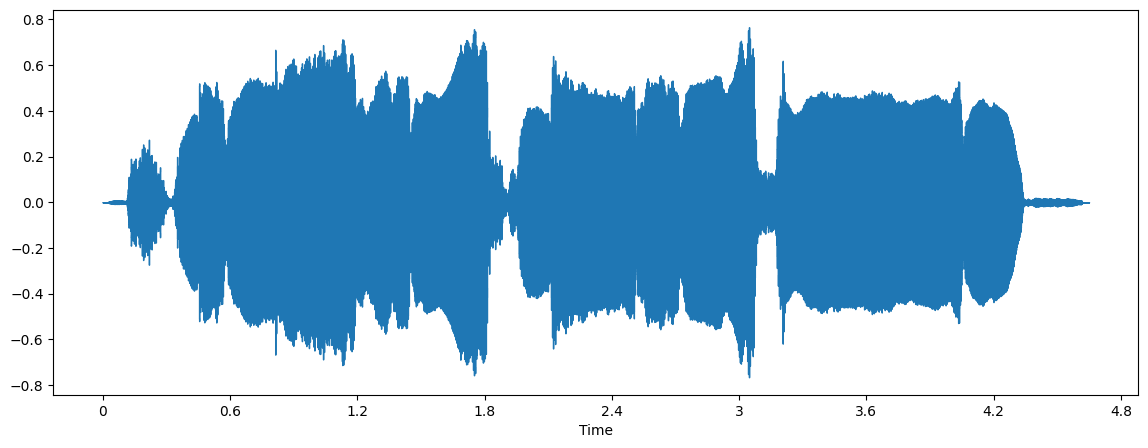

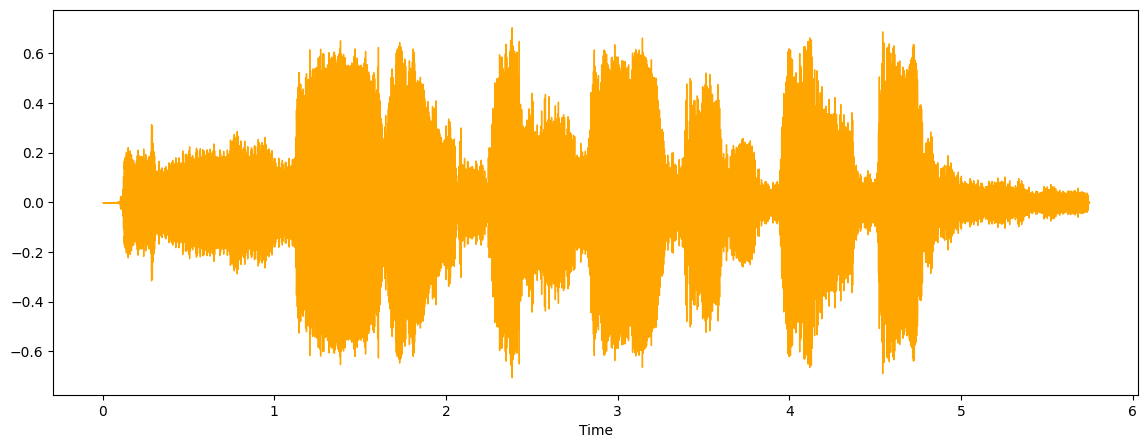

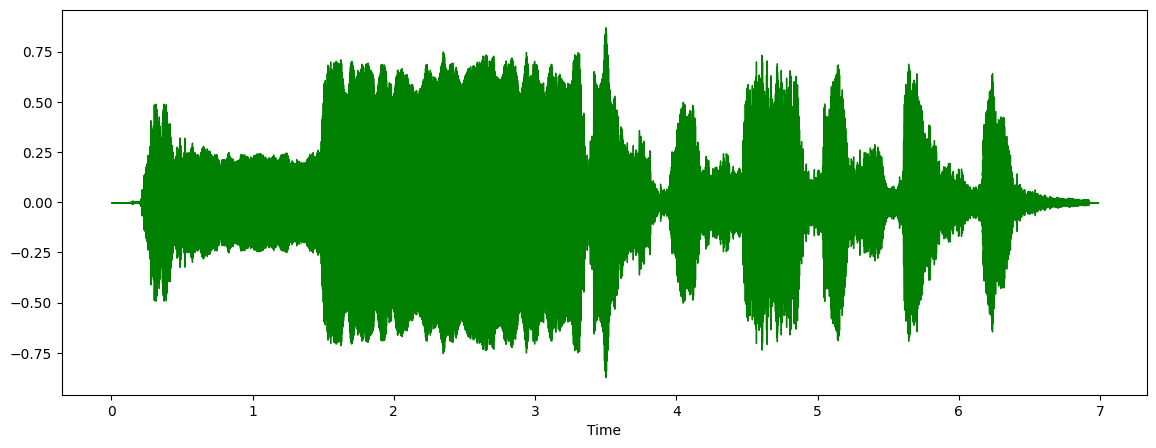

In [52]:
#Plot the signal:
plt.close()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data1, sr=sample_rate1, alpha=0.8)
librosa.display.waveshow(data2, sr=sample_rate2, alpha=0.6)
librosa.display.waveshow(data3, sr=sample_rate3, alpha=0.4)
plt.show()

plt.close()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data1, sr=sample_rate1)
plt.show()

plt.close()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data2, sr=sample_rate2, color='orange')
plt.show()

plt.close()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data3, sr=sample_rate3, color='green')
plt.show()

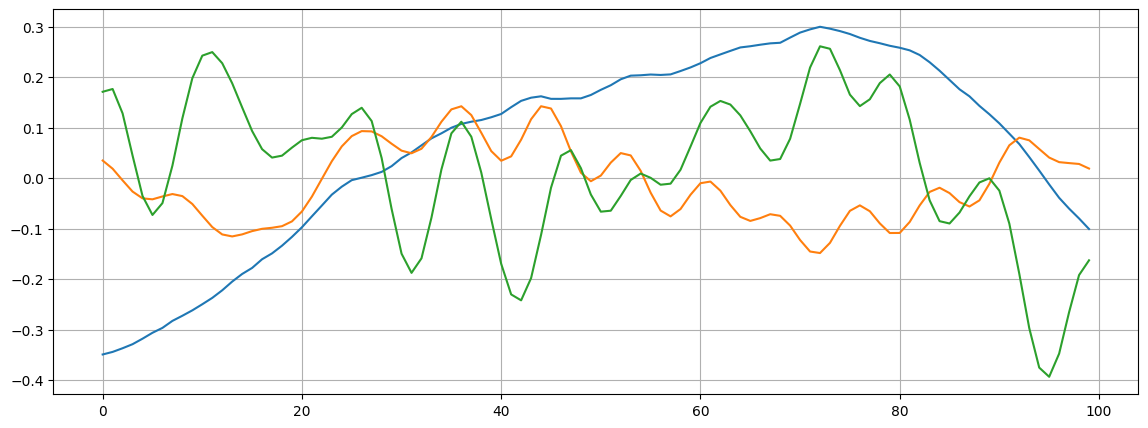

In [43]:
# Zooming in
plt.close()
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(data1[n0:n1])
plt.plot(data2[n0:n1])
plt.plot(data3[n0:n1])
plt.grid()
plt.show()

# Spectral Centroid
#### It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. If the frequencies in music are same throughout then spectral centroid would be around a centre and if there are high frequencies at the end of sound then the centroid would be towards its end.

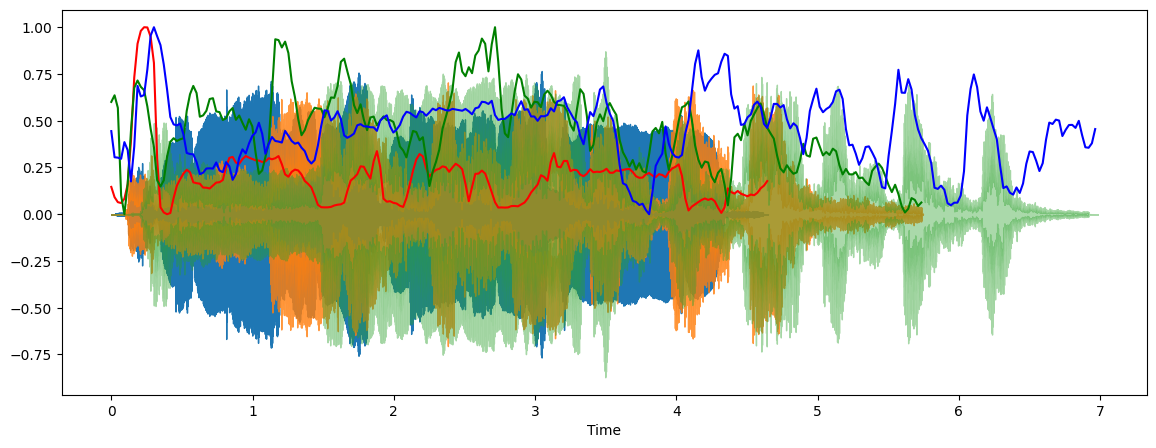

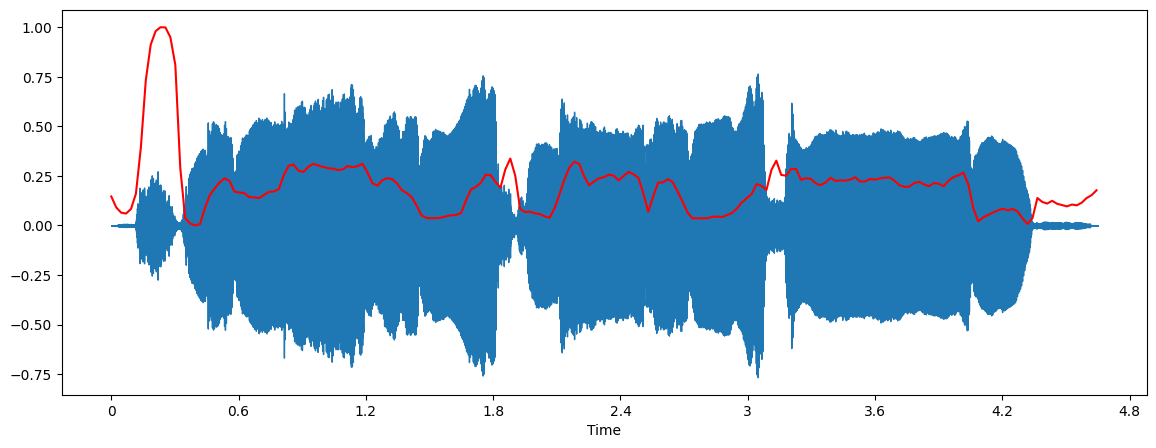

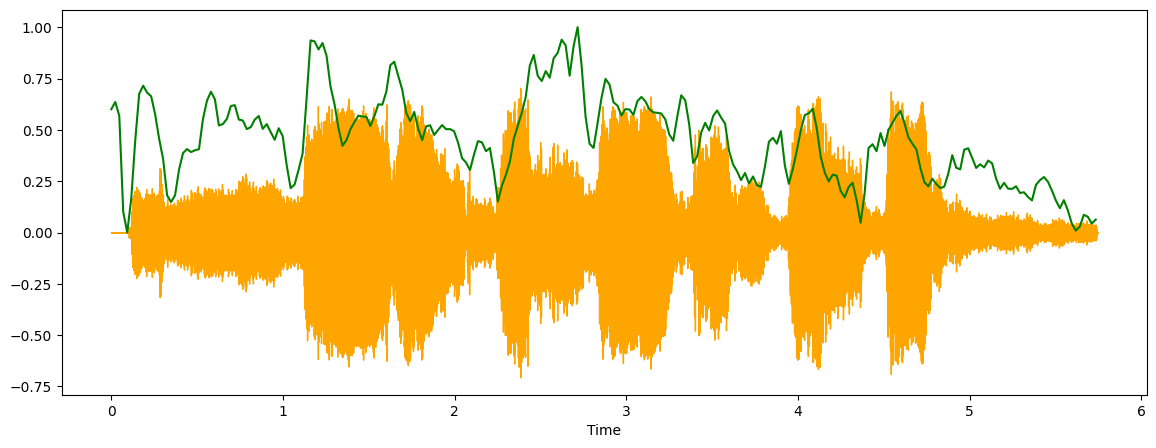

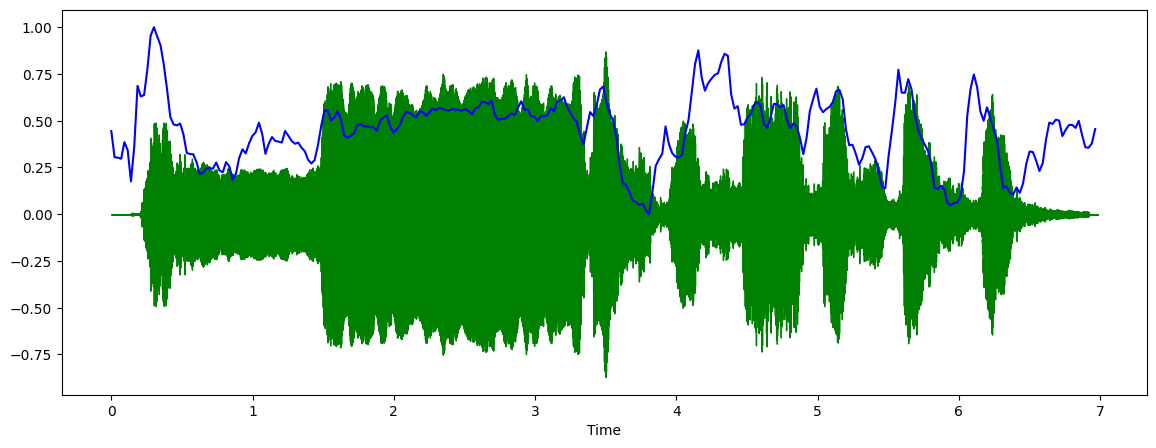

In [51]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
from sklearn import preprocessing

spectral_centroids1 = librosa.feature.spectral_centroid(y=data1, sr=sample_rate1)[0]
spectral_centroids2 = librosa.feature.spectral_centroid(y=data2, sr=sample_rate2)[0]
spectral_centroids3 = librosa.feature.spectral_centroid(y=data3, sr=sample_rate3)[0]

# Computing the time variable for visualization
frames1 = range(len(spectral_centroids1))
frames2 = range(len(spectral_centroids2))
frames3 = range(len(spectral_centroids3))

t1 = librosa.frames_to_time(frames1)
t2 = librosa.frames_to_time(frames2)
t3 = librosa.frames_to_time(frames3)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
plt.close()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data1, sr=sample_rate1)
librosa.display.waveshow(data2, sr=sample_rate2, alpha=0.8)
librosa.display.waveshow(data3, sr=sample_rate3, alpha=0.4)

plt.plot(t1, normalize(spectral_centroids1), color='r')
plt.plot(t2, normalize(spectral_centroids2), color='g')
plt.plot(t3, normalize(spectral_centroids3), color='b')

plt.show()

plt.close()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data1, sr=sample_rate1)
plt.plot(t1, normalize(spectral_centroids1), color='r')
plt.show()

plt.close()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data2, sr=sample_rate2, color='orange')
plt.plot(t2, normalize(spectral_centroids2), color='g')
plt.show()

plt.close()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data3, sr=sample_rate3, color='green')
plt.plot(t3, normalize(spectral_centroids3), color='b')
plt.show()

# Spectral Rolloff
#### Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies and it gives results for each frame.

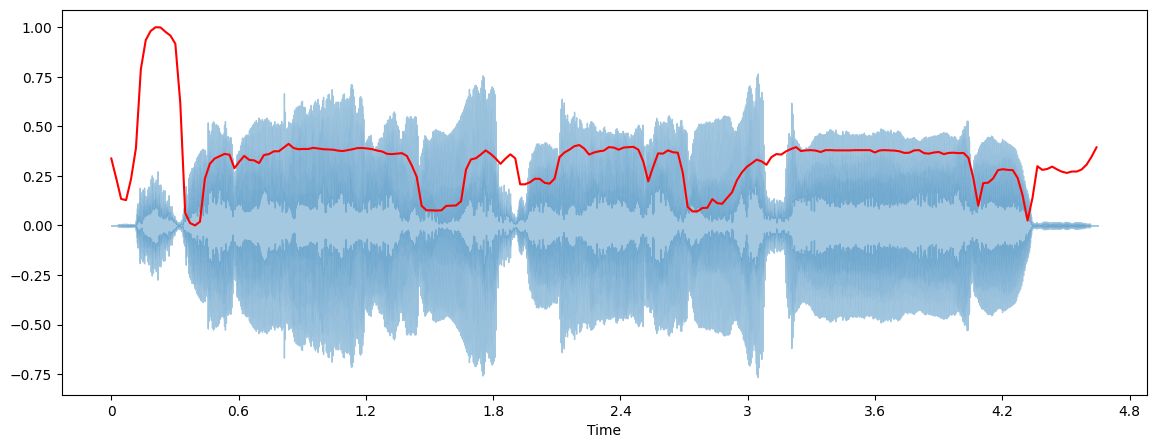

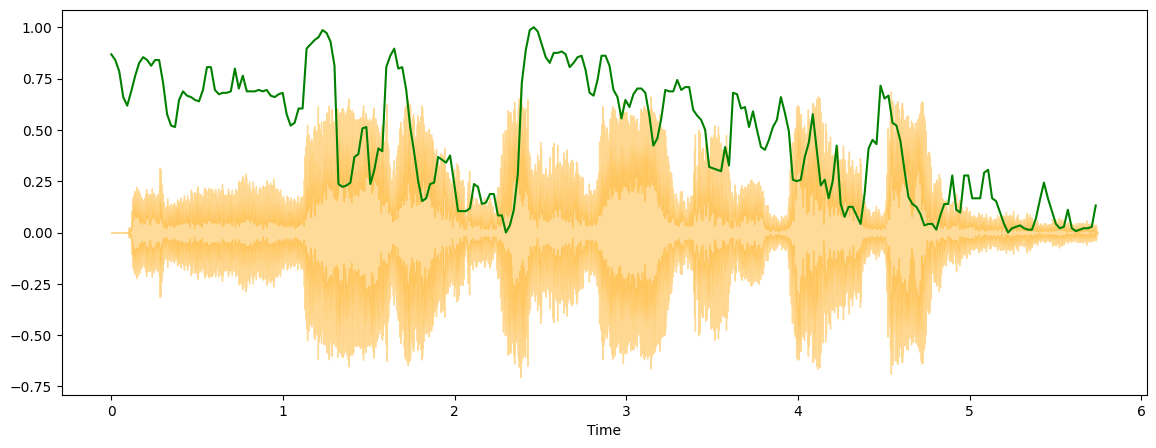

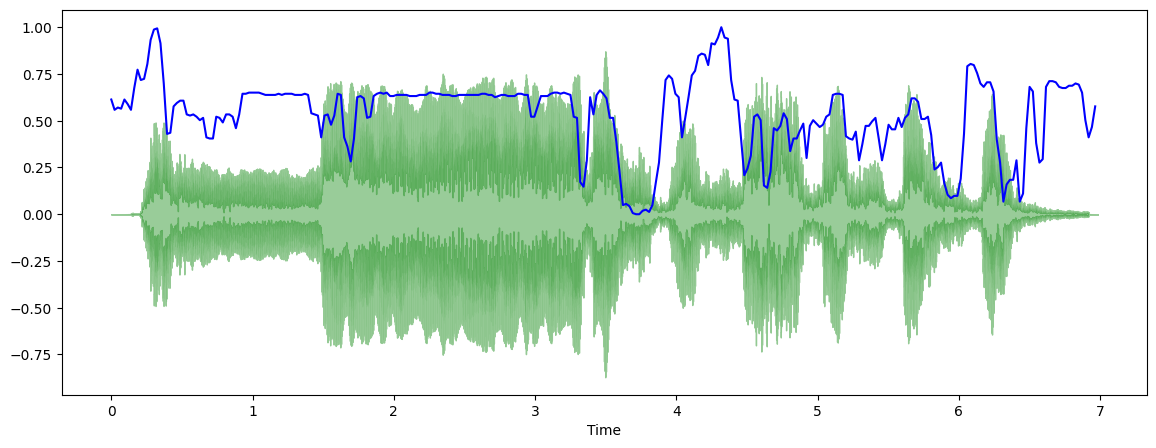

In [54]:
plt.close()
plt.figure(figsize=(14,5))
spectral_rolloff1 = librosa.feature.spectral_rolloff(y=data1, sr=sample_rate1)[0]
librosa.display.waveshow(data1, sr=sample_rate1, alpha=0.4)
plt.plot(t1, normalize(spectral_rolloff1), color='r')
plt.show()

plt.close()
plt.figure(figsize=(14,5))
spectral_rolloff2 = librosa.feature.spectral_rolloff(y=data2, sr=sample_rate2)[0]
librosa.display.waveshow(data2, sr=sample_rate2, alpha=0.4, color='orange')
plt.plot(t2, normalize(spectral_rolloff2), color='g')
plt.show()

plt.close()
plt.figure(figsize=(14,5))
spectral_rolloff3 = librosa.feature.spectral_rolloff(y=data3, sr=sample_rate3)[0]
librosa.display.waveshow(data3, sr=sample_rate3, alpha=0.4, color='green')
plt.plot(t3, normalize(spectral_rolloff3), color='b')
plt.show()

# MFCC — Mel-Frequency Cepstral Coefficients
#### This feature is one of the most important method to extract a feature of an audio signal and is used majorly whenever working on audio signals. The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.

(20, 201) (20, 248) (20, 301)


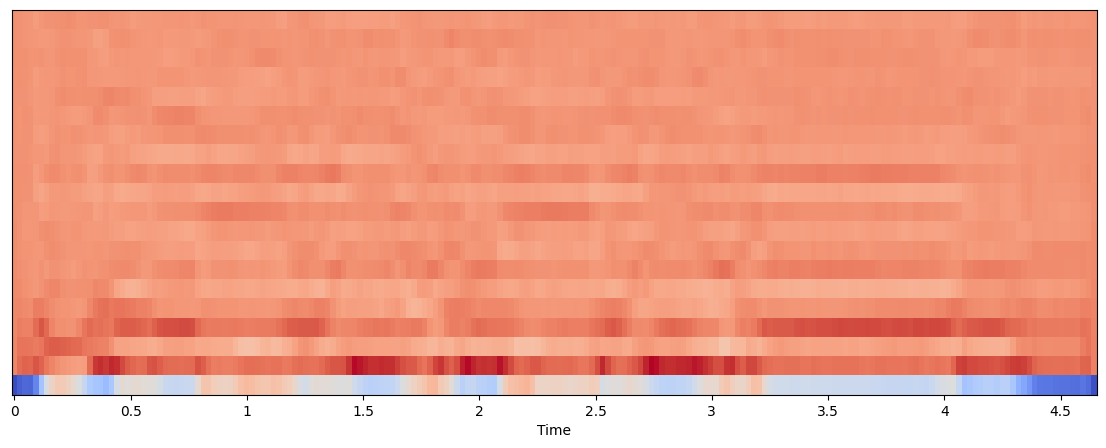

In [47]:
mfccs1 = librosa.feature.mfcc(y=data1, sr=sample_rate1)
mfccs2 = librosa.feature.mfcc(y=data2, sr=sample_rate2)
mfccs3 = librosa.feature.mfcc(y=data3, sr=sample_rate3)

print(mfccs1.shape, mfccs2.shape, mfccs3.shape)
# print(mfccs)
plt.close()
plt.figure(figsize=(14,5))
# Displaying  the MFCCs:
librosa.display.specshow(mfccs1, sr=sample_rate1, x_axis='time')
plt.show()

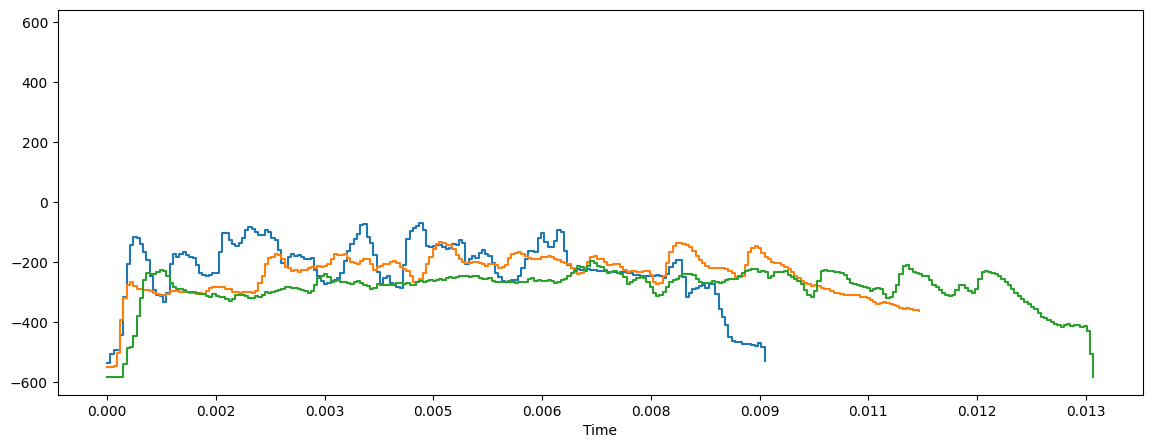

In [48]:
plt.close()
plt.figure(figsize=(14,5))
librosa.display.waveshow(mfccs1, sr=sample_rate1)
librosa.display.waveshow(mfccs2, sr=sample_rate2)
librosa.display.waveshow(mfccs3, sr=sample_rate3)
plt.show()

# Chromagram
#### Chroma features are a powerful representation of music audio in which we use a 12-element representation of spectral energy called a chroma vector where each of the 12 bins represeent the 12 equal-tempered pitch class of western-type music (semitone spacing).
#### A chroma feature or vector is typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, …, B}, is present in the signal. In short, It provides a robust way to describe a similarity measure between music pieces.
#### The 12 bins are clearly visisble in the plots below.It can be computed from the logarithmic short-time Fourier transform of the input sound signal, also called a chromagra

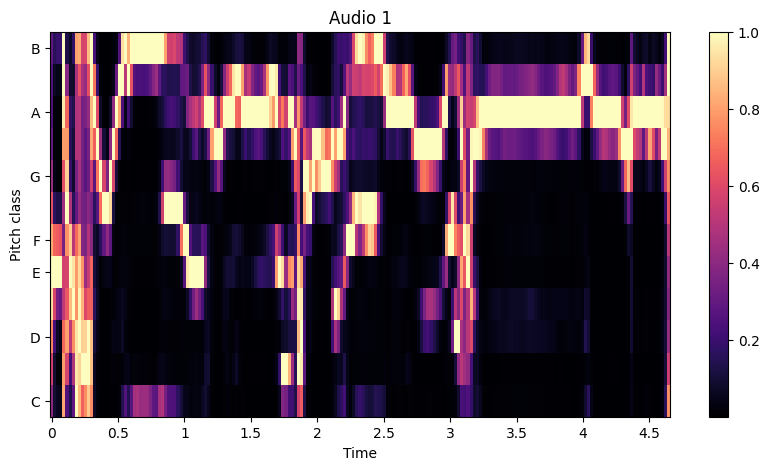

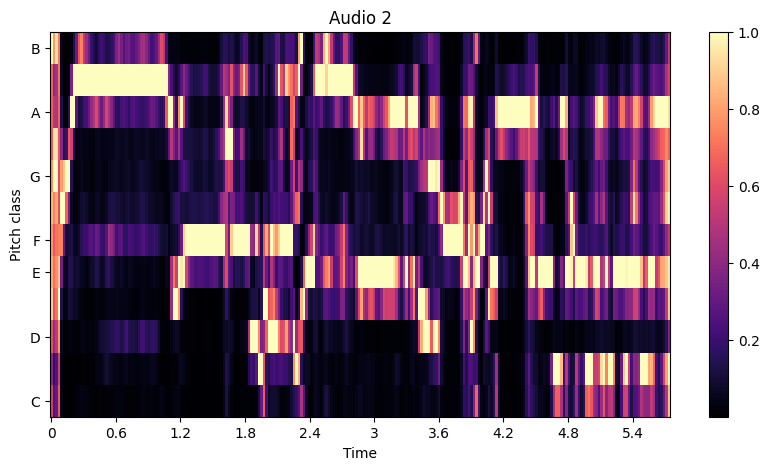

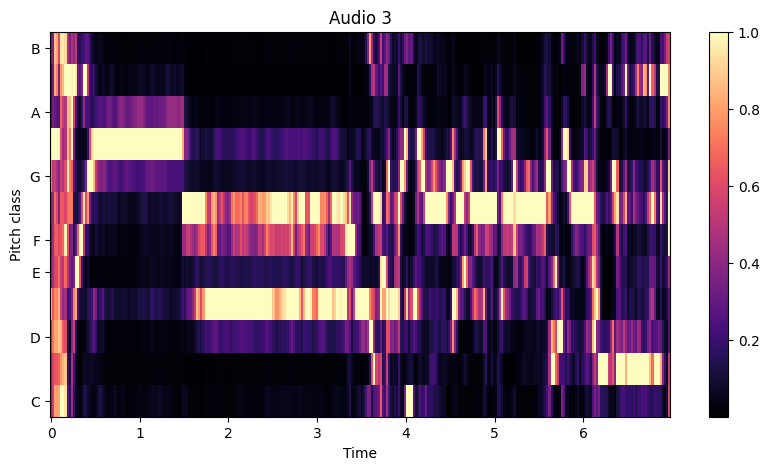

In [20]:
dis_chroma(data1, sample_rate1, title="Audio 1")
dis_chroma(data2, sample_rate2, title="Audio 2")
dis_chroma(data3, sample_rate3, title="Audio 3")

# Constant Q-transform (CQT)
#### The constant-Q transform transforms a data series to the frequency domain. It is related to the Fourier transform.
#### In general, the transform is well suited to musical data and proves useful where frequencies span several octaves.It is more useful in the identification of instruments.
#### To compute a constant-Q spectrogram, will use the libROSA cqt function:

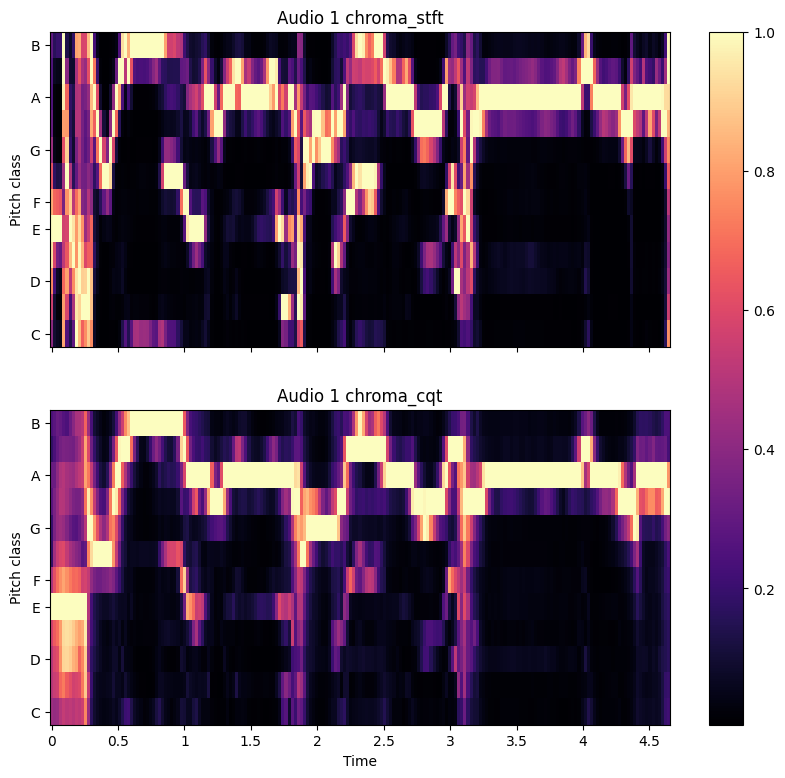

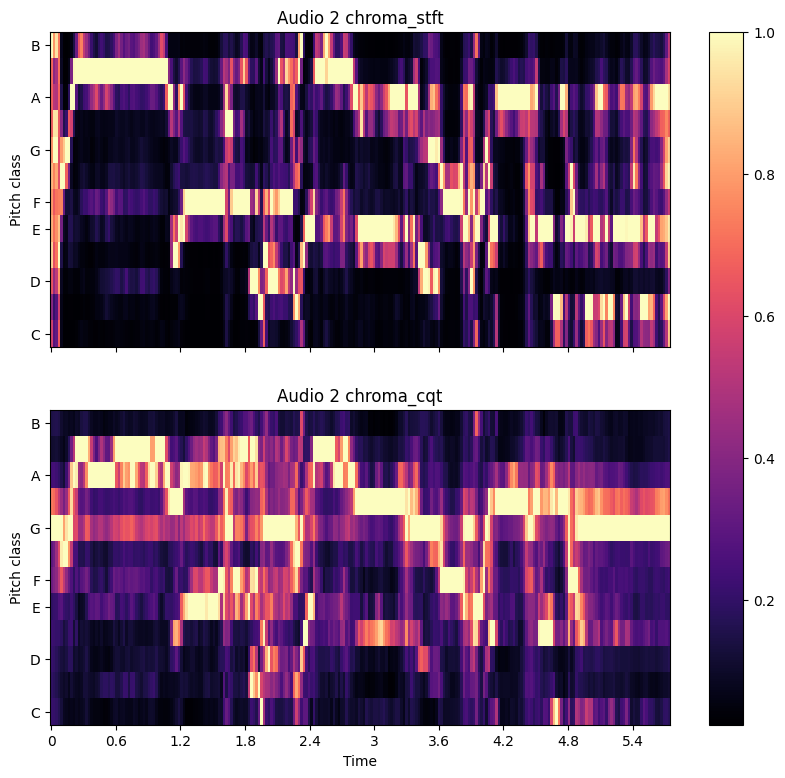

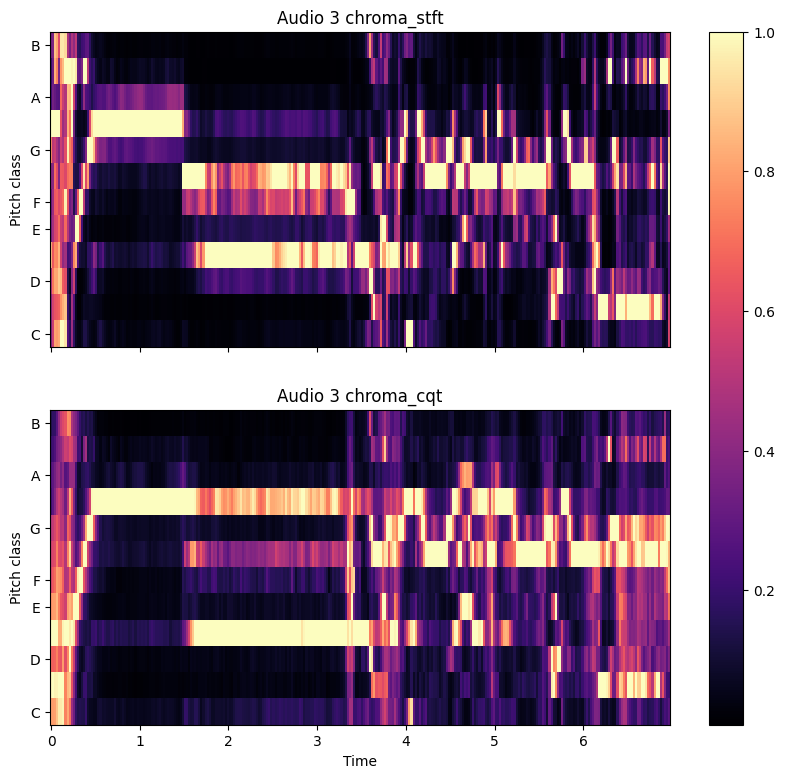

In [24]:
dis_cqt(data1, sample_rate1, title='Audio 1')
dis_cqt(data2, sample_rate2, title='Audio 2')
dis_cqt(data3, sample_rate3, title='Audio 3')

In [ ]:
import os
os.listdir("audios")
path1 = [i for i in os.listdir("audios/1") if i.split('.')[1] == 'mp3']
path2 = [i for i in os.listdir("audios/2") if i.split('.')[1] == 'mp3']

In [42]:
import os
extracted_features = []
def features_extractor(file):
    # load the file (audio)
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    # extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    # in order to find out scaled feature, do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

path = "audios"
for i in path1:
    extracted_features.append([features_extractor(path+'/'+'1'+'/'+i), 1])

for i in path2:
    extracted_features.append([features_extractor(path+'/'+'2'+'/'+i), 2])
print(extracted_features[1], extracted_features[-1])

[array([-225.78764   ,   74.35904   ,  -38.68434   ,   50.79428   ,
         -8.402341  ,  -30.903194  ,    1.5776962 ,   -8.866499  ,
        -24.34011   ,    1.0144717 ,  -33.30143   ,    7.6917253 ,
        -28.203499  ,   -9.332252  ,   -8.9514065 ,  -11.559388  ,
        -14.497025  ,   -9.282761  ,   -8.328988  ,  -14.042765  ,
        -15.697363  ,   -7.131356  ,  -18.5987    ,   -7.6557045 ,
        -14.5014305 ,  -15.426927  ,   -3.9465325 ,   -3.1831279 ,
          6.2363925 ,   19.40405   ,   20.9845    ,   25.172813  ,
         21.151964  ,   11.309303  ,    8.737434  ,    1.6356856 ,
          1.4322064 ,   -0.83543706,    2.8810666 ,   -0.5693901 ],
      dtype=float32), 1] [array([-3.1762292e+02,  1.0007245e+02, -2.1673187e+01,  3.8841694e+01,
        1.6352468e+01, -9.9626045e+00, -8.0644875e+00,  1.8963543e-01,
       -2.9169439e+01, -9.6444917e-01, -1.9058474e+01, -2.1438365e+00,
       -1.0011708e+01, -8.1741486e+00, -8.4388704e+00,  1.4328525e+00,
       -1.6530121e

In [37]:
extracted_features[1]

[array([-225.78764   ,   74.35904   ,  -38.68434   ,   50.79428   ,
          -8.402341  ,  -30.903194  ,    1.5776962 ,   -8.866499  ,
         -24.34011   ,    1.0144717 ,  -33.30143   ,    7.6917253 ,
         -28.203499  ,   -9.332252  ,   -8.9514065 ,  -11.559388  ,
         -14.497025  ,   -9.282761  ,   -8.328988  ,  -14.042765  ,
         -15.697363  ,   -7.131356  ,  -18.5987    ,   -7.6557045 ,
         -14.5014305 ,  -15.426927  ,   -3.9465325 ,   -3.1831279 ,
           6.2363925 ,   19.40405   ,   20.9845    ,   25.172813  ,
          21.151964  ,   11.309303  ,    8.737434  ,    1.6356856 ,
           1.4322064 ,   -0.83543706,    2.8810666 ,   -0.5693901 ],
       dtype=float32),
 1]

In [43]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df

,feature,class
0,"[-225.78764, 74.35904, -38.68434, 50.79428, -8...",1
1,"[-225.78764, 74.35904, -38.68434, 50.79428, -8...",1
2,"[-225.78764, 74.35904, -38.68434, 50.79428, -8...",1
3,"[-225.78764, 74.35904, -38.68434, 50.79428, -8...",1
4,"[-225.78764, 74.35904, -38.68434, 50.79428, -8...",1
...,...,...
635,"[-317.62292, 100.07245, -21.673187, 38.841694,...",2
636,"[-317.62292, 100.07245, -21.673187, 38.841694,...",2
637,"[-317.62292, 100.07245, -21.673187, 38.841694,...",2
638,"[-317.62292, 100.07245, -21.673187, 38.841694,...",2


In [44]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [45]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [48]:
# Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
### No of classes
num_labels=y.shape[1]
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [49]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [50]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
num_epochs = 50
num_batch_size = 32
checkpointer = ModelCheckpoint(filepath='./audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/50
 1/18 [>.............................] - ETA: 17s - loss: 38.5389 - accuracy: 0.3125
Epoch 1: val_loss improved from inf to 0.12109, saving model to ./audio_classification.hdf5
18/18 [==============================] - 1s 20ms/step - loss: 16.4824 - accuracy: 0.6007 - val_loss: 0.1211 - val_accuracy: 1.0000
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 6.3919 - accuracy: 0.6788
Epoch 2: val_loss improved from 0.12109 to 0.00009, saving model to ./audio_classification.hdf5
18/18 [==============================] - 0s 9ms/step - loss: 6.3919 - accuracy: 0.6788 - val_loss: 8.5866e-05 - val_accuracy: 1.0000
Epoch 3/50
17/18 [===========================>..] - ETA: 0s - loss: 3.1596 - accuracy: 0.7776
Epoch 3: val_loss did not improve from 0.00009
18/18 [==============================] - 0s 6ms/step - loss: 3.0678 - accuracy: 0.7795 - val_loss: 2.3901e-04 - val_accuracy: 1.0000
Epoch 4/50
 1/18 [>.............................] - ETA: 0s - loss: 2.0749 - accurac

In [51]:
filename="test3.wav"
#preprocess the audio file
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
#Reshape MFCC feature to 2-D array
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
x_predict=model.predict(mfccs_scaled_features) 
predicted_label=np.argmax(x_predict,axis=1)
prediction_class = labelencoder.inverse_transform(predicted_label) 
print(prediction_class)

1/1 [==============================] - 0s 79ms/step
[1]
[2]
